# ESAME MARZO B 2024

In un processo chiamato mitosi, il tempo che impiega una cellula a dividersi segue una distribuzione
 normale di media 60 minuti e deviazione standard di 5 minuti.
 1. Qual ` e la probabilita che una cellula si divida in meno di 45 minuti?
 2. Qual ` e la probabilita che una cellula si divida in piu di 65 minuti?
 3. Qual ` e il tempo impiegato approssimativamente dal 99% delle cellule per completare la mitosi?
 4. Su un campione di 20 cellule, qual e la probabilita che il tempo medio di divisione sia minore di
 58 minuti?

In [2]:
# 1 
from scipy.stats import norm
import numpy as np

#usare la norm cdf

mu=60
S=5

p=norm.cdf(45,mu,S)

print(p)

0.001349898031630093


In [2]:
# 2 

p=norm.sf(65,mu,S)

print(p)

0.15865525393145707


In [4]:
#3
x= 0.99
#Quale é il tempo impiegato approssimativamente dal 99% delle cellule per completare la mitosi?
p=norm.ppf(x,mu,S)

print(p)

71.6317393702042


In [7]:
#4
# Parametri del problema
mu = 60  # Media della popolazione
sigma = 5  # Deviazione standard della popolazione
n = 20  # Dimensione del campione
mean_sample = 58  # Media campionaria

# Deviazione standard della media campionaria
sigma_sample = sigma / np.sqrt(n)

# Calcolo del valore z
z = (mean_sample - mu) / sigma_sample

# Calcolo della probabilità
prob =norm.cdf(z)
print(f"La probabilità che il tempo medio di divisione sia minore di 58 minuti è: {prob:.4f}")

La probabilità che il tempo medio di divisione sia minore di 58 minuti è: 0.0368


# Esercizio 2

 Il costo unitario (y) di un certo prodotto varia in funzione del numero (x) di pezzi richiesti. I dati
 sono riportati nella seguente tabella
 x 20 25 30 35 40 50 60 65 70 75 80 90
 y 1.81 1.70 1.65 1.55 1.48 1.40 1.30 1.26 1.24 1.21 1.20 1.18
 1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
 giustifichi mediante il coefficiente di determinazione se il modello `e adeguato oppure no.
 2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
 3. Si determinino i coefficienti per un modello di regressione lineare del tipo y = a0 +a1x+a2x2 e
 si calcoli nuovamente il coefficiente di determinazione.
 4. Si determinino gli intervalli di confidenza al 95% per i nuovi coefficienti.

In [3]:
# 1

import numpy as np
from scipy.stats import norm,t
import matplotlib.pyplot as plt

x = np.array([20,25,30,35,40,50,60,65,70,75,80,90])
y = np.array([1.81, 1.70, 1.65, 1.55, 1.48, 1.40, 1.30, 1.26, 1.24,
              1.21, 1.20, 1.18])

display(x)
display(y)


array([20, 25, 30, 35, 40, 50, 60, 65, 70, 75, 80, 90])

array([1.81, 1.7 , 1.65, 1.55, 1.48, 1.4 , 1.3 , 1.26, 1.24, 1.21, 1.2 ,
       1.18])

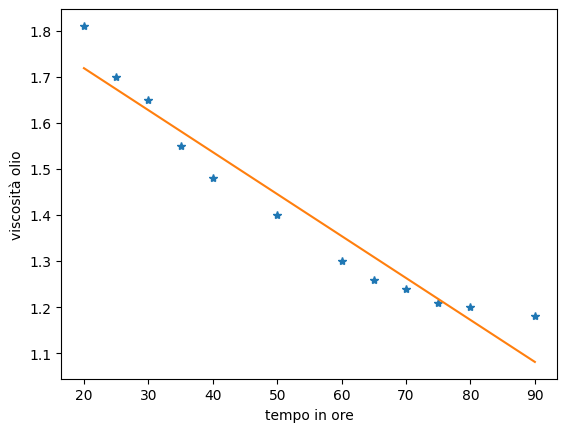

In [6]:
#trovare coefficienti b0 e b1
n=x.size

x_mean=np.mean(x)
y_mean=np.mean(y)

dev_xy=np.sum(x*y-x_mean*y_mean)/n

dev_x=np.std(x)
sig_x2=np.sum((x**2)-(x_mean**2))/n

#TROVO b0
b0=y_mean - (dev_xy/sig_x2)*x_mean

#TROVO B1
b1=dev_xy/sig_x2

xx=np.linspace(20,90,1000)

yy=b0+b1*xx

plt.plot(x,y,'*')
plt.plot(xx,yy)
plt.xlabel('tempo in ore')
plt.ylabel('viscosità olio')
plt.show()

In [7]:
#calcolo l'intervallo di confidenza al 95%

alpha=0.05
y_hat=b0*b1*x
r=y-y_hat

s2= np.sum(r**2)/(n-2)
s=np.sqrt(s2)

T=t.ppf(1-alpha/2,n-2)

b0_l=b0-s*np.sqrt(1/n+x_mean**2/(n*sig_x2))*T
b0_r=b0+s*np.sqrt(1/n+x_mean**2/(n*sig_x2))*T


b1_l=b1-(s/np.sqrt(sig_x2)*np.sqrt(n))*T
b1_r=b1+(s/np.sqrt(sig_x2)*np.sqrt(n))*T

display(b0)
display(b0_l,b0_r)

display(b1)
display(b1_l,b1_r)

1.9003631284916191

-2.3831939989960707

6.183920255979309

-0.00910055865921786

-0.8983103700550205

0.8801092527365847

In [8]:
#coefficiente di determinazione

sig_y2=np.sum((y-y_mean)**2)/n
R2= (dev_xy)**2/(sig_x2*sig_y2)

display(R2)

0.9385761352241756

In [ ]:
#il modello di regressione è adeguato

# ESERCIZIO 3

 Il tempo di vita in ore di una batteria segue approssimativamente una distribuzione normale con
 deviazione standard σ = 1.25. Viene estratto un campione casuale di 10 batterie e si testa per
 ciascuna di esse il tempo di vita ottenendo i seguenti valori
 39.5, 41.5, 38.5, 42.5, 37.5, 43.5, 36.5, 44.5, 35.5, 45.5.
 1. Si calcoli la media campionaria e l’intervallo di confidenza per la media con livello di fiducia
 0.05.
 2. Vi ` e evidenza nel supportare l’ipotesi che il tempo di vita ecceda le 40 ore? Si usi α = 0.05.
 3. Calcolare il p-value del test precedente.
 4. Se il tempo di vita reale fosse di 42 ore quale sarebbe l’errore di secondo tipo del test precedente?

In [2]:
import numpy as np
x = np.array([ 39.5, 41.5, 38.5, 42.5, 37.5, 43.5, 36.5, 44.5, 35.5, 45.5])

n=np.size(x)

display(x)
display(n)

array([39.5, 41.5, 38.5, 42.5, 37.5, 43.5, 36.5, 44.5, 35.5, 45.5])

10

In [6]:
#media campionaria
from scipy.stats import norm

me= np.mean(x)
sigma= 1.25
alpha=0.05

phi=norm.ppf(1-alpha/2)

Il=me-sigma/np.sqrt(n)*phi
Ir=me+sigma/np.sqrt(n)*phi

display(Il,Ir)


39.725256209619296

41.274743790380704

In [9]:
#2 eccede le 40 ore il tempo di vita? alpha=0.05
alpha=0.05

#test di ipotesi per la media
#IPOTESI NULLA H0 <= 40
#IPOTESI ALTERNATIVA H1 > 40

mu_0=40
mu=me

#calcolo Z

Z_0=(mu-mu_0)/sigma*np.sqrt(n)
display(Z_0)

1.264911064067352

In [12]:
PHI=norm.ppf(1-alpha/2)
display(PHI)

1.959963984540054

In [ ]:
#siccome z_0 < PHI non abbiamo elementi sufficienti
#per rigettare l'ipotesi nulla

In [18]:
# p_value

p_value=2*(1-norm.cdf(np.abs(Z_0)))
display(p_value)



0.2059032107320682

In [19]:
# se il tempo di vita reale fosse di 42 ore quale sarebbe
#l'errore di secondo tipo del test precedente?

mu_1=42

beta_crit=(PHI*(sigma/np.sqrt(n)))+mu_0
Z_star=(beta_crit-mu_1)/(sigma)*np.sqrt(n)
error=norm.cdf(Z_star)

display(error)

0.0009686482254082832